<a href="https://colab.research.google.com/github/aniyant/Deep-Learning-Computer-Vision/blob/main/Copy_of_TranferLearningPOC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **POC - Proof of Concept of Transfer Learning in ANN and CNN**


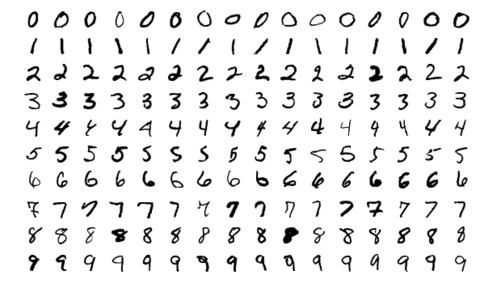

In [93]:
# Importing some libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score

### MNIST DATASET

In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
# segregation of Training and testing dataset
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
X_train_full.shape  # training dataset

(60000, 28, 28)

In [6]:
X_train_full[0].shape # shape of one single image

(28, 28)

In [7]:
y_train_full.shape  # shape of label or output dataset

(60000,)

In [8]:
y_train_full[0]    # output value corresponding the image data

5

In [9]:
X_test.shape    # shape of testing dataset

(10000, 28, 28)

In [10]:
y_test.shape 

(10000,)

In [11]:
img = X_train_full[0]  # first image of training data
img   

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

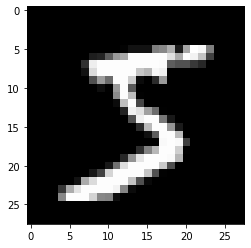

In [12]:
plt.imshow(img, cmap="gray")      # showing image

In [13]:
label = y_train_full[0]   # output label of the above shown image in y_train data
label

5

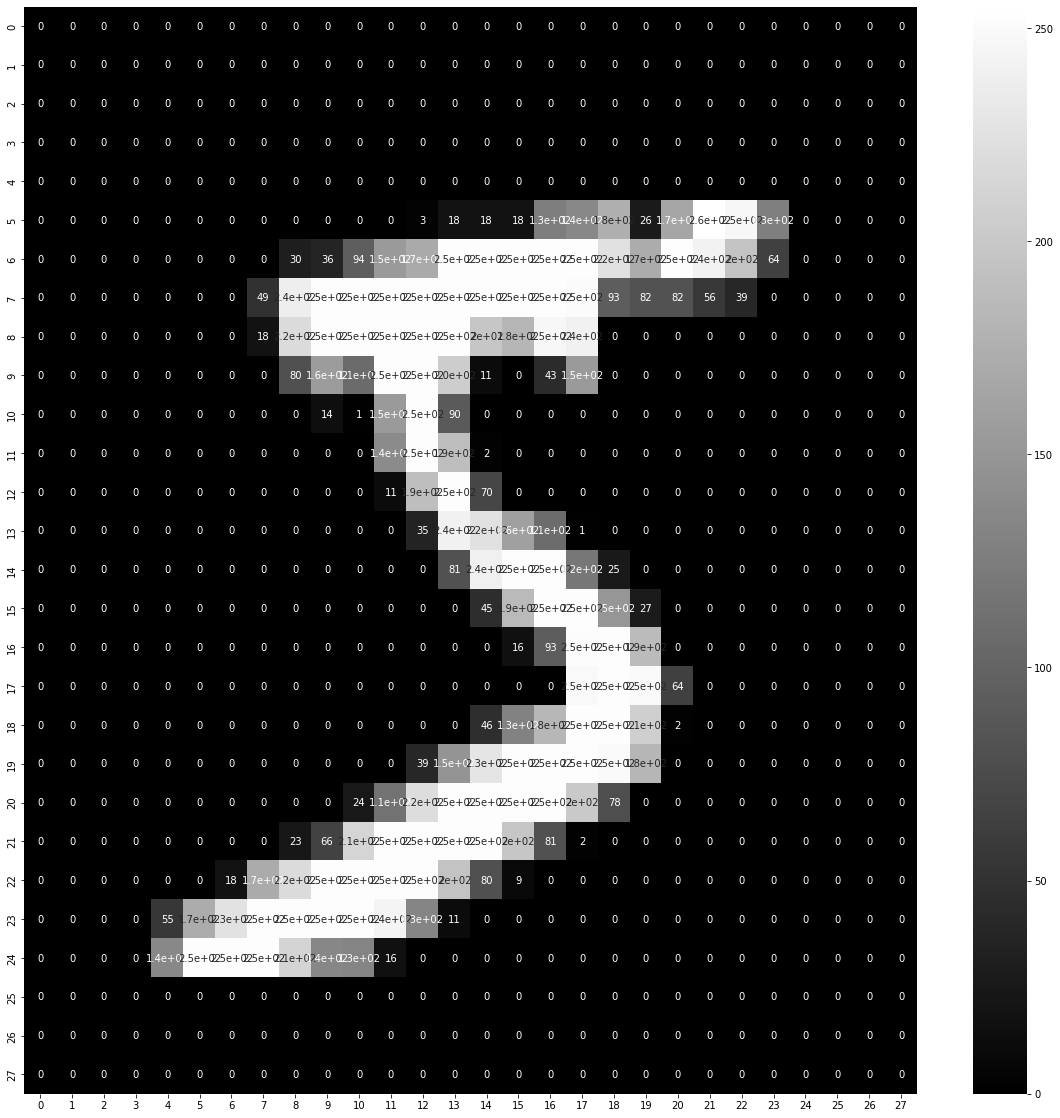

In [14]:
# plotting image with each pixel value in it 
plt.figure(figsize=(20,20))    # setting plt figure size
sns.heatmap(img, annot=True, cmap="gray")    # using sns.heatmap, we can use img/255 to normalize the value

In [15]:
print(1e+1, 1e+2, 1e+4, 1.5e+1, 1.5e+2)

10.0 100.0 10000.0 15.0 150.0


In [16]:
1.5e+2  # means 1.5 * (10**2)  

150.0

1. *0 -> 255* => More computation time, and Search space is large for finding solution.

2. *0 -> 1* => Less computation time, and Search space is small for finding solution.


In [17]:
# segregating validation and training dataset

X_valid, X_train = X_train_full[:5000]/255, X_train_full[5000:]/255  # why divide by 255 reason given above
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

X_test = X_test/255 

In [18]:
np.unique(y_train)     # different types of labels we have

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [19]:
len(np.unique(y_train))  # 10 different types of labels we have

10

In [20]:
CLASSES = len(np.unique(y_train)) 
CLASSES

10

### ANN - Artificial Neural Network Model

In [21]:
# Defining ANN Layers
LAYERS = [
    tf.keras.layers.Flatten(input_shape=(28, 28), name="inputLayer"), # 28*28 = 784 total number of neuron at this layer
    tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer01"), # 300 layers
    tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer02"), # 100 layers
    tf.keras.layers.Dense(CLASSES, activation="softmax", name="outputLayer"), # 10 output labels
]

In [22]:
ANN_model_clf = tf.keras.models.Sequential(LAYERS)  # creating model

In [23]:
ANN_model_clf.summary()  

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer01 (Dense)       (None, 300)               235500    
                                                                 
 hiddenLayer02 (Dense)       (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Total trainable parameters at hidden layer01
784*300 + 300 # 784(input) * 300(weights of 300 neuron at hiddenLayer01) + 300 (biases)

235500

In [25]:
# Total trainable parameters at hidden layer02
300*100 + 100  #300(output Edges from 300 neuron at hiddenLayer01 ) * 100(weights of 100 neuron at hiddenLayer02) + 100(biases)

30100

In [26]:
# Total trainable parameters at output layer
100 * 10 + 10   # 100(100 neuron at hiddenLayer02 os 100 output edges)*10(neuron at output layer) + 10(biases)

1010

In [27]:
# Total Number of parameters in ANN
235500 + 30100 + 1010

266610

In [28]:
# Compiling model
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZERS = "SGD"
METRICS = ["accuracy"]

ANN_model_clf.compile(loss=LOSS_FUNCTION, optimizer=OPTIMIZERS, metrics=METRICS)

In [29]:
# Training the ANN model
EPOCHS = 30 

VALIDATION = (X_valid, y_valid)

history = ANN_model_clf.fit(
    X_train,
    y_train,
    epochs = EPOCHS,
    batch_size=32,
    validation_data = VALIDATION
)

Epoch 1/30
1719/1719 [==============================] - 7s 3ms/step - loss: 0.6026 - accuracy: 0.8411 - val_loss: 0.3069 - val_accuracy: 0.9142
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2870 - accuracy: 0.9180 - val_loss: 0.2388 - val_accuracy: 0.9328
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2358 - accuracy: 0.9335 - val_loss: 0.2009 - val_accuracy: 0.9446
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2015 - accuracy: 0.9427 - val_loss: 0.1751 - val_accuracy: 0.9518
Epoch 5/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.1761 - accuracy: 0.9497 - val_loss: 0.1601 - val_accuracy: 0.9584
Epoch 6/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.1555 - accuracy: 0.9559 - val_loss: 0.1441 - val_accuracy: 0.9602
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1389 - accuracy: 0.9602 - val_loss: 0.1370 - val_accuracy:

In [30]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.602583,0.841127,0.306945,0.9142
1,0.287045,0.918036,0.238777,0.9328
2,0.235803,0.933545,0.200872,0.9446
3,0.201510,0.942655,0.175132,0.9518
4,0.176078,0.949709,0.160087,0.9584
5,0.155475,0.955927,0.144078,0.9602
6,0.138908,0.960218,0.137016,0.9612
7,0.125565,0.964418,0.124601,0.9652
8,0.113823,0.967545,0.117422,0.9688
9,0.103897,0.971055,0.109604,0.9706


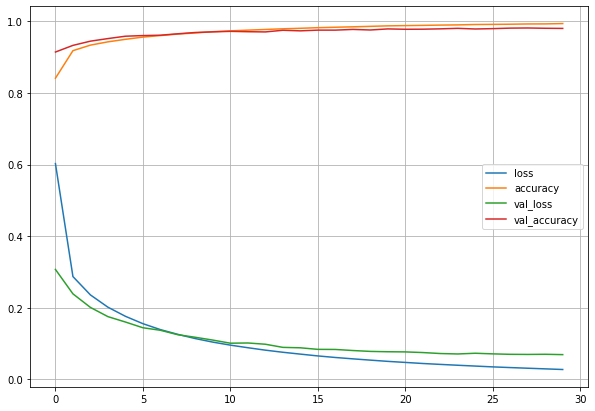

In [31]:
# plotting datafram
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.grid(True)
plt.show()

In [32]:
# Evaluating the model for accuracy
ANN_model_clf.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0704 - accuracy: 0.9791


[0.07042375952005386, 0.9790999889373779]

In [33]:
ANN_model_clf.save("mnist_full.h5") 

In [34]:
# Let's test how model is able to predict the output label from the input image data
X_new = X_test[:3]    # extracting 3 images data from test data

y_prob = ANN_model_clf.predict(X_new) # prediction of output label probabilites 
y_prob.round(3)  # show probability of each output label

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.997, 0.   , 0.   , 0.   , 0.   , 0.   , 0.002, 0.   ,
        0.   ]], dtype=float32)

In [35]:
X_new.shape

(3, 28, 28)

In [36]:
y_prob.shape

(3, 10)

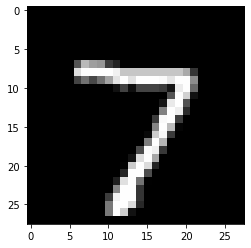

In [37]:
plt.imshow(X_new[0], cmap="gray") # image at 0th index o

In [38]:
Y_pred = np.argmax(y_prob, axis=-1)
Y_pred[0]   # Predicted output label

7

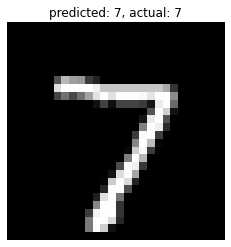

------------------------------------------------------------


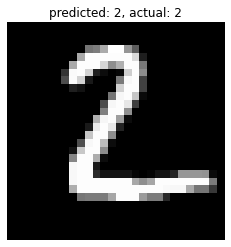

------------------------------------------------------------


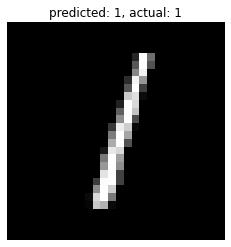

------------------------------------------------------------


In [40]:
# Testing the model with some actual and prediction
for img_array, pred, actual in zip(X_new, Y_pred, y_test[:3]):
    plt.imshow(img_array, cmap="gray")
    plt.title(f"predicted: {pred}, actual: {actual}")
    plt.axis("off")
    plt.show()
    print("--"*30)

**OBSERVATION:- Model is able to predict the number associated with image**

In [81]:
# Make Prediction of X_test dataset
y_prob = ANN_model_clf.predict(X_test)
y_prob.shape

(10000, 10)

In [85]:
y_pred = np.argmax(y_prob,axis=-1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [87]:
# confusion matrix
confusion_matrix(y_test,y_pred)

array([[ 968,    0,    1,    2,    2,    2,    0,    1,    3,    1],
       [   0, 1124,    2,    1,    0,    2,    2,    1,    3,    0],
       [   4,    2, 1008,    5,    2,    0,    0,    7,    4,    0],
       [   0,    0,    4,  993,    0,    3,    0,    3,    5,    2],
       [   0,    0,    4,    1,  965,    0,    1,    2,    1,    8],
       [   2,    0,    0,    6,    2,  874,    4,    1,    2,    1],
       [   6,    3,    0,    1,    7,    8,  929,    0,    4,    0],
       [   0,    4,    9,    3,    0,    1,    0,  999,    4,    8],
       [   3,    0,    3,    6,    3,    3,    2,    2,  950,    2],
       [   2,    2,    1,    7,    9,    1,    0,    2,    4,  981]])

In [90]:
# Accuracy score using sklearn
accuracy_score(y_test,y_pred)

0.9791

In [94]:
# Precision 
precision_score(y_test,y_pred,average='weighted')

0.9791474880189343

In [41]:
y_train.shape

(55000,)

In [42]:
y_train[1]

3


y_train - 

data_points | label
-|-
0|7
1|3

X_train 

data_points | data
-|-
0|(28, 28)
1|(28, 28)
2|(28, 28)
3|(28, 28)


data 

data_points | data | label
-|-| -
0|(28, 28) | 7
1|(28, 28) | 3
2|(28, 28)
3|(28, 28)


# Transfer learning in ANN

## New problem statement - 
Classify handwritten digits into odd and even

In [43]:
pretrained_ANN_model = tf.keras.models.load_model("mnist_full.h5")  # loading the above saved model

In [44]:
pretrained_ANN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer01 (Dense)       (None, 300)               235500    
                                                                 
 hiddenLayer02 (Dense)       (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [45]:
# Checking for Trainable layers
for layer in pretrained_ANN_model.layers:
    print(f"{layer.name}: {layer.trainable}")

inputLayer: True
hiddenLayer01: True
hiddenLayer02: True
outputLayer: True


In [46]:
# Setting trainable features of layers
for layer in pretrained_ANN_model.layers[:-1]: # leave the last layer
    layer.trainable = False

In [47]:
for layer in pretrained_ANN_model.layers:
    print(f"{layer.name}: {layer.trainable}")

inputLayer: False
hiddenLayer01: False
hiddenLayer02: False
outputLayer: True


In [48]:
# Extraction of the layers whose Trainable features are disabled now
lower_pretrained_model = pretrained_ANN_model.layers[:-1]

In [49]:
# Creating new ANN model where output layer have two neurons one for odd and other for even
new_ANN_model = tf.keras.models.Sequential(lower_pretrained_model)
new_ANN_model.add(
    tf.keras.layers.Dense(2, activation="softmax")
)

In [50]:
new_ANN_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer01 (Dense)       (None, 300)               235500    
                                                                 
 hiddenLayer02 (Dense)       (None, 100)               30100     
                                                                 
 dense (Dense)               (None, 2)                 202       
                                                                 
Total params: 265,802
Trainable params: 202
Non-trainable params: 265,600
_________________________________________________________________


In [51]:
# Trainable params at output layer for rest layers this is disabled
100*2 + 2

202

In [52]:
# function to update labels 
def update_even_odd_labels(labels):
    for idx, label in enumerate(labels):
        labels[idx] = np.where(label%2 == 0, 1, 0) # 1 -> even, 0 -> odd
    return labels

In [53]:
ex_1 = np.array([1,2,3,4,5])
ex_1

array([1, 2, 3, 4, 5])

In [54]:
# showing enurmerate builtin function functionality
for idx, label in enumerate(ex_1):
    # print(idx, label)
    print(ex_1[idx], np.where(label%2 == 0, 1, 0))

1 0
2 1
3 0
4 1
5 0


In [55]:
# Updating labels in two classes 0 and 1
y_train_bin, y_test_bin, y_valid_bin = update_even_odd_labels([y_train, y_test, y_valid])

In [56]:
np.unique(y_train_bin)

array([0, 1])

In [57]:
new_ANN_model.compile(loss="sparse_categorical_crossentropy",
                  optimizer="SGD",
                  metrics=["accuracy"]
                  )

In [58]:
# Training the model
history = new_ANN_model.fit(
    X_train, y_train_bin, epochs=10, validation_data = (X_valid, y_valid_bin)
)

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1695 - accuracy: 0.9398 - val_loss: 0.1212 - val_accuracy: 0.9600
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1162 - accuracy: 0.9606 - val_loss: 0.1086 - val_accuracy: 0.9624
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1081 - accuracy: 0.9631 - val_loss: 0.1058 - val_accuracy: 0.9630
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1037 - accuracy: 0.9645 - val_loss: 0.1018 - val_accuracy: 0.9648
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1013 - accuracy: 0.9654 - val_loss: 0.1008 - val_accuracy: 0.9646
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0991 - accuracy: 0.9665 - val_loss: 0.0978 - val_accuracy: 0.9650
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0975 - accuracy: 0.9665 - val_loss: 0.0964 - val_accuracy:

In [59]:
new_ANN_model.evaluate(X_test, y_test_bin)

313/313 [==============================] - 1s 2ms/step - loss: 0.1030 - accuracy: 0.9640


[0.10295837372541428, 0.9639999866485596]

In [60]:
X_new = X_test[:3]

y_prob = new_ANN_model.predict(X_new)
y_prob.round(3)  # probabilties output label of images X_new

array([[1.   , 0.   ],
       [0.   , 1.   ],
       [0.984, 0.016]], dtype=float32)

In [61]:
Y_pred = np.argmax(y_prob, axis=-1)
Y_pred

array([0, 1, 0])

In [62]:
y_test_bin[:3]

array([0, 1, 0])

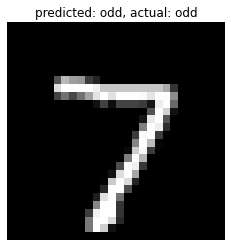

------------------------------------------------------------


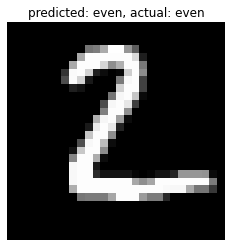

------------------------------------------------------------


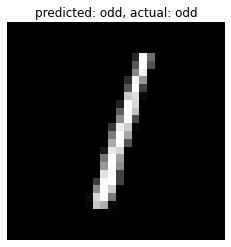

------------------------------------------------------------


In [63]:
# Testing of model for classification of image in even or odd 
for img_array, pred, actual in zip(X_new, Y_pred, y_test_bin[:3]):
    if pred == 1:
        pred = "even"
    else:
        pred = "odd"

    if actual == 1:
        actual = "even"
    else:
        actual = "odd"
    plt.imshow(img_array, cmap="gray")
    plt.title(f"predicted: {pred}, actual: {actual}")
    plt.axis("off")
    plt.show()
    print("--"*30)

**OBSERVATION:- Model created using Transfer learning technique is able to classify image as odd or even.**

In [101]:
# Make Prediction for X_test dataset
y_prob = new_ANN_model.predict(X_test)
y_prob.shape


(10000, 2)

In [102]:
y_pred = np.argmax(y_prob,axis=-1)
y_pred


array([0, 1, 0, ..., 1, 0, 1])

In [109]:
# confusion matrix
confusion_matrix(y_test_bin,y_pred)

array([[4901,  173],
       [ 187, 4739]])

In [110]:
# Accuracy score using sklearn
accuracy_score(y_test_bin,y_pred)

0.964

In [111]:
# Precision 
precision_score(y_test_bin,y_pred)

0.9647801302931596

OBSERVATION: Accuracy score of the model created using Transfer learning is 0.96

# Train A CNN model on MNIST data

In [112]:
X_train[0].shape

(28, 28)

In [113]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [68]:
np.expand_dims(X_train, -1).shape  # showing example of working of np.expand_dims

(55000, 28, 28, 1)

In [69]:
np.expand_dims(X_train, -2).shape    # showing example of working of np.expand_dims

(55000, 28, 1, 28)

In [70]:
np.expand_dims(X_train, -3).shape      # showing example of working of np.expand_dims

(55000, 1, 28, 28)

In [71]:
np.expand_dims(X_train, 1).shape      # showing example of working of np.expand_dims

(55000, 1, 28, 28)

In [72]:
np.expand_dims(X_train, 3).shape     # showing example of working of np.expand_dims

(55000, 28, 28, 1)

In [114]:
# Adding one more dimension, this dimension signify number of channel of image data
X_train_CNN = np.expand_dims(X_train, -1)
X_test_CNN = np.expand_dims(X_test, -1)
X_valid_CNN = np.expand_dims(X_valid, -1)

In [115]:
X_train_CNN.shape 

(55000, 28, 28, 1)

OBSERVATION:- The above you can see 5500 is number of image data, 28*28 is height and width, 1 is channel

In [116]:
X_train_CNN[0] # first image data

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [117]:
X_train_CNN[0].shape  # first image data shape

(28, 28, 1)

In [118]:
# Creating Layers for the CNN Model
input_shape = (28, 28, 1) # (row, col, channels)
CLASSES = 10
LAYERS = [
    tf.keras.Input(shape=input_shape),
    tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(CLASSES, activation="softmax")
]

In [120]:
# Creating CNN model
CNN_model = tf.keras.Sequential(
    LAYERS
)

In [121]:
CNN_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 10)               

In [124]:
64*5*5  # Flatten input

1600

In [125]:
(3*3*1 + 1) * 32  # convo 1 params

320

In [126]:
(28 - 3) // 1 + 1 # After filter new image height or width

26

In [127]:
(26 - 2) // 2 + 1  # After max-pooling

13

In [128]:
(3*3*32 + 1) * 64  # convo 2 params

18496

In [129]:
1600 * 10 + 10

16010

In [130]:
CNN_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 10)               

In [131]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZERS = "SGD"
METRICS = ["accuracy"]

CNN_model.compile(loss=LOSS_FUNCTION, optimizer=OPTIMIZERS, metrics=METRICS)

In [132]:
# Training CNN Model
CNN_model.fit(X_train, y_train, epochs=10, validation_data = (X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 16s 4ms/step - loss: 0.6112 - accuracy: 0.8207 - val_loss: 0.2276 - val_accuracy: 0.9364
Epoch 2/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1878 - accuracy: 0.9446 - val_loss: 0.1393 - val_accuracy: 0.9610
Epoch 3/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1294 - accuracy: 0.9620 - val_loss: 0.1063 - val_accuracy: 0.9684
Epoch 4/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1051 - accuracy: 0.9688 - val_loss: 0.0916 - val_accuracy: 0.9718
Epoch 5/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0911 - accuracy: 0.9722 - val_loss: 0.0808 - val_accuracy: 0.9780
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0804 - accuracy: 0.9761 - val_loss: 0.0745 - val_accuracy: 0.9778
Epoch 7/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0740 - accuracy: 0.9774 - val_loss: 0.0666 - val_accuracy

In [137]:
# Extracting 3 images for testing purpose
X_new = X_test[:3]

y_prob = CNN_model.predict(X_new)
y_prob.round(3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   ],
       [0.   , 0.001, 0.999, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.999, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]], dtype=float32)

In [138]:
Y_pred = np.argmax(y_prob, axis=-1)
Y_pred    # prediction

array([7, 2, 1])

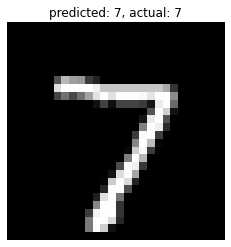

------------------------------------------------------------


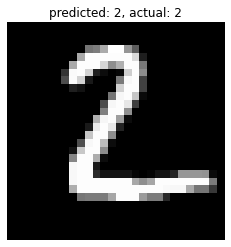

------------------------------------------------------------


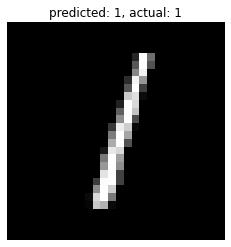

------------------------------------------------------------


In [139]:
# comparing actual and prediction
for img_array, pred, actual in zip(X_new, Y_pred, y_test[:3]):
    plt.imshow(img_array, cmap="gray")
    plt.title(f"predicted: {pred}, actual: {actual}")
    plt.axis("off")
    plt.show()
    print("--"*30)

In [141]:
CNN_model.save("CNN_model.h5")

In [142]:
# Makeing prediction on whole test dataset
y_prob = CNN_model.predict(X_test)
y_prob.shape


(10000, 10)

In [143]:
y_pred = np.argmax(y_prob,axis=-1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [144]:
# confusion matrix
confusion_matrix(y_test,y_pred)



array([[ 972,    0,    0,    0,    0,    2,    1,    2,    3,    0],
       [   0, 1126,    1,    2,    1,    1,    1,    2,    1,    0],
       [   2,    3, 1011,    3,    1,    0,    0,    6,    5,    1],
       [   1,    0,    0, 1000,    0,    3,    0,    4,    2,    0],
       [   1,    0,    0,    1,  968,    0,    1,    1,    1,    9],
       [   2,    0,    0,    6,    0,  881,    1,    1,    1,    0],
       [   8,    2,    0,    1,    2,    5,  939,    0,    1,    0],
       [   1,    4,    6,    4,    0,    0,    0, 1008,    1,    4],
       [   7,    1,    2,    3,    2,    3,    1,    2,  951,    2],
       [   3,    5,    0,    3,    3,    4,    0,    2,    2,  987]])

In [145]:
# Accuracy score using sklearn
accuracy_score(y_test,y_pred)

0.9843

In [146]:
# Accuracy score using sklearn
accuracy_score(y_test,y_pred)

0.9843

OBSERVATION: CNN Model have accuracy score 0.98 which better than ANN

##**Transfer Learning in CNN**

### New problem statement - 
Classify handwritten digits into odd and even

In [148]:
CNN_pretrained_model = tf.keras.models.load_model('CNN_model.h5')

In [149]:
CNN_pretrained_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 10)               

In [150]:
# Checking Traininable parameter of CNN
for layer in CNN_pretrained_model.layers:
    print(f"{layer.name}: {layer.trainable}")


conv2d_2: True
max_pooling2d_2: True
conv2d_3: True
max_pooling2d_3: True
flatten_1: True
dense_2: True


In [151]:
for layer in CNN_pretrained_model.layers[:-1]: # leave the last layer
    layer.trainable = False  # disabling trainable params

In [152]:
for layer in CNN_pretrained_model.layers:
    print(f"{layer.name}: {layer.trainable}")


conv2d_2: False
max_pooling2d_2: False
conv2d_3: False
max_pooling2d_3: False
flatten_1: False
dense_2: True


In [153]:
# Extracting CNN leaving output layer
lower_CNN_pretrained_model = CNN_pretrained_model.layers[:-1]

In [154]:
lower_CNN_pretrained_model

In [155]:
# Creating new CNN Model using Extracted layers hence doing Transfer learning
new_CNN_model = tf.keras.models.Sequential(lower_CNN_pretrained_model)
new_CNN_model.add(
    tf.keras.layers.Dense(2, activation="softmax")
)

In [157]:
#updating labels
def update_even_odd_labels(labels):
    for idx, label in enumerate(labels):
        labels[idx] = np.where(label%2 == 0, 1, 0) # 1 -> even, 0 -> odd
    return labels


In [158]:
y_train_bin, y_test_bin, y_valid_bin = update_even_odd_labels([y_train, y_test, y_valid])

In [160]:
# Expanding dimension
X_train_CNN = np.expand_dims(X_train, -1)
X_test_CNN = np.expand_dims(X_test, -1)
X_valid_CNN = np.expand_dims(X_valid, -1)

In [161]:
X_train_CNN.shape

(55000, 28, 28, 1)

In [162]:
np.unique(y_train_bin)

array([0, 1])

In [163]:
new_CNN_model.compile(loss="sparse_categorical_crossentropy",
                  optimizer="SGD",
                  metrics=["accuracy"]
                  )


In [164]:
# Building CNN Model by giving input layer shape
new_CNN_model.build(input_shape=(None,28,28,1))

In [165]:
new_CNN_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_3 (Dense)             (None, 2)                

In [166]:
type(X_train_CNN)

numpy.ndarray

In [167]:
# Training new model
history = new_CNN_model.fit(X_train_CNN, 
                            y_train_bin, 
                            epochs=10, 
                            validation_data=(X_valid_CNN,y_valid_bin)
                            )


Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1750 - accuracy: 0.9417 - val_loss: 0.1245 - val_accuracy: 0.9526
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0949 - accuracy: 0.9664 - val_loss: 0.0756 - val_accuracy: 0.9714
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0838 - accuracy: 0.9703 - val_loss: 0.0660 - val_accuracy: 0.9776
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0790 - accuracy: 0.9725 - val_loss: 0.0664 - val_accuracy: 0.9768
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0753 - accuracy: 0.9736 - val_loss: 0.0624 - val_accuracy: 0.9766
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0718 - accuracy: 0.9746 - val_loss: 0.0588 - val_accuracy: 0.9784
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0696 - accuracy: 0.9753 - val_loss: 0.0584 - val_accuracy:

In [168]:
new_CNN_model.evaluate(X_test_CNN, y_test_bin)

313/313 [==============================] - 1s 2ms/step - loss: 0.0534 - accuracy: 0.9809


[0.05336078628897667, 0.98089998960495]

In [169]:
X_new = X_test_CNN[:3]

In [171]:
X_new = X_new.reshape((3,28,28))  # reshaping for prediction as model take 3 dimension image 

In [172]:
X_new.shape

(3, 28, 28)

In [174]:
y_prob = new_CNN_model.predict(X_new)
y_prob.round(3)


array([[1.   , 0.   ],
       [0.   , 1.   ],
       [0.993, 0.007]], dtype=float32)

In [175]:
Y_pred = np.argmax(y_prob, axis=-1)
Y_pred


array([0, 1, 0])

In [176]:
y_test_bin[:3]

array([0, 1, 0])

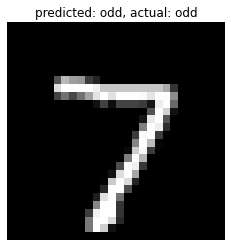

------------------------------------------------------------


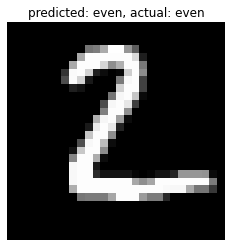

------------------------------------------------------------


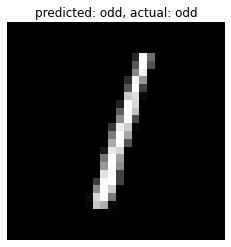

------------------------------------------------------------


In [178]:
# comparing actual and prediction of 3 images from test dataset
for img_array, pred, actual in zip(X_new, Y_pred, y_test_bin[:3]):
    if pred == 1:
        pred = "even"
    else:
        pred = "odd"

    if actual == 1:
        actual = "even"
    else:
        actual = "odd"
    plt.imshow(img_array, cmap="gray")
    plt.title(f"predicted: {pred}, actual: {actual}")
    plt.axis("off")
    plt.show()
    print("--"*30)

**OBSERVATION:- Model created using Transfer learning is able to classify image which numbers as even or odd.**

In [179]:
#Making Prediction on whole dataset
y_prob = new_CNN_model.predict(X_test)
y_prob.shape


(10000, 2)

In [180]:
y_pred = np.argmax(y_prob,axis=-1)
y_pred


array([0, 1, 0, ..., 1, 0, 1])

In [181]:
# confusion matrix
confusion_matrix(y_test_bin,y_pred)


array([[4943,  131],
       [  60, 4866]])

In [182]:
# Accuracy score using sklearn
accuracy_score(y_test_bin,y_pred)


0.9809

In [183]:
# Precision 
precision_score(y_test_bin,y_pred,average='weighted')

0.9810009827683538

### OBSERVATION:- Transfer Learning can be done in ANN and CNN both.